In [1]:
#Assignment c) (Lecture 19: Inheritance) — The L & I (Liskov Substitution & Interface Segregation)
#📝 Challenge Title: Workout Devices Simulation


from abc import ABC, abstractmethod


class WorkoutDevice(ABC):
    """Abstract base class for all workout devices."""

    @abstractmethod
    def start_tracking(self):
        pass

    @abstractmethod
    def stop_tracking(self):
        pass

    @abstractmethod
    def get_data(self):
        """Return workout data as a dictionary."""
        pass


class HeartRateMonitor(ABC):
    """Separate interface for devices that can measure heart rate."""

    @abstractmethod
    def get_heart_rate(self):
        pass


class SmartWatch(WorkoutDevice, HeartRateMonitor):
    """Tracks multiple metrics including heart rate."""
    def __init__(self):
        self.tracking = False

    def start_tracking(self):
        self.tracking = True
        print("SmartWatch: Tracking started.")

    def stop_tracking(self):
        self.tracking = False
        print("SmartWatch: Tracking stopped.")

    def get_data(self):
        return {"time": 45, "steps": 4000, "distance_km": 3.2}

    def get_heart_rate(self):
        return {"heart_rate_bpm": 78}


class SmartShoe(WorkoutDevice):
    """Tracks steps and distance but not heart rate."""
    def __init__(self):
        self.tracking = False

    def start_tracking(self):
        self.tracking = True
        print("SmartShoe: Tracking started.")

    def stop_tracking(self):
        self.tracking = False
        print("SmartShoe: Tracking stopped.")

    def get_data(self):
        return {"time": 30, "steps": 2500, "distance_km": 2.1}

    def get_heart_rate(self):
        print("SmartShoe: Heart rate not supported.")
        return None  # Graceful failure


class HeartRateBand(WorkoutDevice, HeartRateMonitor):
    """Tracks heart rate but not steps or distance."""
    def __init__(self):
        self.tracking = False

    def start_tracking(self):
        self.tracking = True
        print("HeartRateBand: Tracking started.")

    def stop_tracking(self):
        self.tracking = False
        print("HeartRateBand: Tracking stopped.")

    def get_data(self):
        return {"time": 20, "steps": 0, "distance_km": 0}

    def get_heart_rate(self):
        return {"heart_rate_bpm": 85}


def test_devices():
    """Demonstrate polymorphism and substitution."""
    devices = [SmartWatch(), SmartShoe(), HeartRateBand()]

    for device in devices:
        device.start_tracking()
        print("Data:", device.get_data())

        # Use Liskov Substitution: all devices behave correctly as WorkoutDevice
        if hasattr(device, "get_heart_rate"):
            hr = device.get_heart_rate()
            if hr:
                print("Heart Rate:", hr)
        device.stop_tracking()
        print("-" * 40)


# Run the test
if __name__ == "__main__":
    test_devices()


SmartWatch: Tracking started.
Data: {'time': 45, 'steps': 4000, 'distance_km': 3.2}
Heart Rate: {'heart_rate_bpm': 78}
SmartWatch: Tracking stopped.
----------------------------------------
SmartShoe: Tracking started.
Data: {'time': 30, 'steps': 2500, 'distance_km': 2.1}
SmartShoe: Heart rate not supported.
SmartShoe: Tracking stopped.
----------------------------------------
HeartRateBand: Tracking started.
Data: {'time': 20, 'steps': 0, 'distance_km': 0}
Heart Rate: {'heart_rate_bpm': 85}
HeartRateBand: Tracking stopped.
----------------------------------------


This design follows the Liskov Substitution Principle (LSP) by ensuring that all subclasses of WorkoutDevice — such as SmartWatch, SmartShoe, and HeartRateBand — can be used interchangeably without breaking the program. Each subclass implements the same core interface (start_tracking(), stop_tracking(), and get_data()), so the test_devices() function treats all devices uniformly.

The Interface Segregation Principle (ISP) is applied by splitting the WorkoutDevice interface from the HeartRateMonitor interface. Not all devices track heart rate, so separating that responsibility prevents classes like SmartShoe from being forced to implement unnecessary methods. When a non-supported feature is requested (e.g., get_heart_rate() in SmartShoe), it fails gracefully instead of breaking the program.

This structure makes the system modular, extendable, and easy to maintain, aligning with both LSP and ISP principles.

🏋️ Welcome to the Fitness Tracker CLI 🏋️
Workout Types: run, walk, bike

Enter workout type (or 'done' to finish): run
Enter start time (HH:MM): 14:00
Enter end time (HH:MM): 15:00
Enter distance in km: 2
Added Running | Duration: 1:00:00 | Calories: 600.00

Enter workout type (or 'done' to finish): walk
Enter start time (HH:MM): 1:00
Enter end time (HH:MM): 2:00
Enter distance in km: 4
Added Walking | Duration: 1:00:00 | Calories: 250.00

Enter workout type (or 'done' to finish): done

--- Workout Summary ---
🏃‍♂️ Running | Duration: 1:00:00 | Calories: 600.00 kcal
🚶‍♀️ Walking | Duration: 1:00:00 | Calories: 250.00 kcal

Save workouts? (csv/json/none): json
Workouts saved to workouts.json
Would you like to plot durations? (yes/no): yes


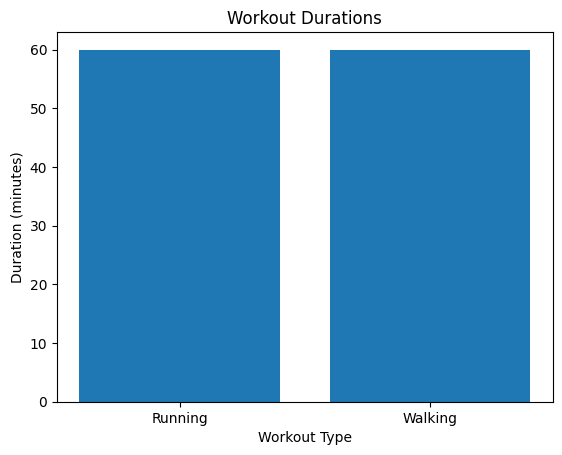

In [3]:
#Assignment d) (Lecture 20: Fitness Tracker – Final Challenge) — The D (Dependency Inversion Principle)
#📝 Challenge Title: Extend Fitness Tracker – Add a BikeWorkout + Planner CLI


from datetime import datetime
import json
import csv
import matplotlib.pyplot as plt
from abc import ABC, abstractmethod


# ----- Base Abstract Class -----
class Workout(ABC):
    """Abstract base class for all workout types."""

    def __init__(self, start, end, calories=None):
        self.start = datetime.strptime(start, "%H:%M")
        self.end = datetime.strptime(end, "%H:%M")
        self.calories = calories

    def get_duration(self):
        return self.end - self.start

    @abstractmethod
    def get_calories(self):
        pass

    def __eq__(self, other):
        return self.get_duration() == other.get_duration() and type(self) == type(other)


# ----- Subclasses -----
class RunWorkout(Workout):
    def __init__(self, start, end, distance_km, calories=None):
        super().__init__(start, end, calories)
        self.distance = distance_km
        self.icon = "🏃‍♂️"
        self.kind = "Running"

    def get_calories(self):
        return self.get_duration().total_seconds() / 3600 * 600  # 600 kcal/hr


class WalkWorkout(Workout):
    def __init__(self, start, end, distance_km, calories=None):
        super().__init__(start, end, calories)
        self.distance = distance_km
        self.icon = "🚶‍♀️"
        self.kind = "Walking"

    def get_calories(self):
        return self.get_duration().total_seconds() / 3600 * 250  # 250 kcal/hr


class BikeWorkout(Workout):
    def __init__(self, start, end, distance_km, calories=None):
        super().__init__(start, end, calories)
        self.distance = distance_km
        self.icon = "🚴🏽‍♂️"
        self.kind = "Cycling"

    def get_calories(self):
        return self.get_duration().total_seconds() / 3600 * 300  # 300 kcal/hr


# ----- Planner (High-level Module) -----
class WorkoutPlanner:
    """Planner depends on the Workout abstraction, not concrete classes."""

    def __init__(self):
        self.workouts = []

    def add_workout(self, workout: Workout):
        self.workouts.append(workout)

    def show_summary(self):
        print("\n--- Workout Summary ---")
        for w in self.workouts:
            duration = w.get_duration()
            calories = w.get_calories()
            print(f"{w.icon} {w.kind} | Duration: {duration} | Calories: {calories:.2f} kcal")

    def save_to_csv(self, filename="workouts.csv"):
        with open(filename, "w", newline="") as file:
            writer = csv.writer(file)
            writer.writerow(["Type", "Duration(min)", "Calories"])
            for w in self.workouts:
                writer.writerow([w.kind, round(w.get_duration().total_seconds()/60, 2), round(w.get_calories(), 2)])
        print(f"Workouts saved to {filename}")

    def save_to_json(self, filename="workouts.json"):
        data = [
            {"type": w.kind, "duration_min": round(w.get_duration().total_seconds()/60, 2),
             "calories": round(w.get_calories(), 2)}
            for w in self.workouts
        ]
        with open(filename, "w") as file:
            json.dump(data, file, indent=4)
        print(f"Workouts saved to {filename}")

    def plot_durations(self):
        kinds = [w.kind for w in self.workouts]
        durations = [w.get_duration().total_seconds() / 60 for w in self.workouts]

        plt.bar(kinds, durations)
        plt.title("Workout Durations")
        plt.xlabel("Workout Type")
        plt.ylabel("Duration (minutes)")
        plt.show()


# ----- CLI -----
def planner_cli():
    planner = WorkoutPlanner()
    print("🏋️ Welcome to the Fitness Tracker CLI 🏋️")
    print("Workout Types: run, walk, bike")

    while True:
        choice = input("\nEnter workout type (or 'done' to finish): ").lower()
        if choice == "done":
            break

        start = input("Enter start time (HH:MM): ")
        end = input("Enter end time (HH:MM): ")
        distance = float(input("Enter distance in km: "))

        if choice == "run":
            w = RunWorkout(start, end, distance)
        elif choice == "walk":
            w = WalkWorkout(start, end, distance)
        elif choice == "bike":
            w = BikeWorkout(start, end, distance)
        else:
            print("Invalid workout type. Try again.")
            continue

        planner.add_workout(w)
        print(f"Added {w.kind} | Duration: {w.get_duration()} | Calories: {w.get_calories():.2f}")

    planner.show_summary()

    save = input("\nSave workouts? (csv/json/none): ").lower()
    if save == "csv":
        planner.save_to_csv()
    elif save == "json":
        planner.save_to_json()

    plot = input("Would you like to plot durations? (yes/no): ").lower()
    if plot == "yes":
        planner.plot_durations()


# Run the CLI
if __name__ == "__main__":
    planner_cli()


This design follows the Dependency Inversion Principle (DIP) by ensuring that the high-level WorkoutPlanner class depends on the abstract Workout interface, not on specific subclasses like RunWorkout, WalkWorkout, or BikeWorkout. Each workout type implements the same base methods (get_duration(), get_calories()), allowing the planner to interact with any workout type polymorphically. This decouples the planner from the specific workout implementations — new workout types can be added later without changing the planner’s code, making the system more modular, extendable, and maintainable.